### The chi-square tests Cramér’s V were conducted to examine the association between mortality and various comorbidities or demographic factors.
#### **1. Chi-Square Test:**
The chi2_contingency() function is used to perform the Chi-Square Test, which helps determine if there is a significant relationship between two categorical variables. The function returns four values:
- chi2: The test statistic.
- p: The p-value of the test, which tells you whether the result is statistically significant.
- dof: The degrees of freedom for the test.
- expected_freq: The expected frequency counts for each combination, assuming the null hypothesis of independence is true.

**Interpretation:**
- If the p-value is less than or equal to the significance level (alpha = 0.05), we reject the null hypothesis (H0) and accept the alternative hypothesis (H1), which suggests that the variables are dependent.
- If the p-value is greater than 0.05, we fail to reject the null hypothesis, implying that the variables are independent.

**Limitation:**
- Chi-square test does not measure strength of this relationship. 
- Additionally, when the dataset is very large (which is the case here), even small effects can lead to a statistically significant Chi-square test (p-value ≈ 0.0000).

Therefore, Cramér’s V is also conducted - it accounts for sample size and adjusts the effect size accordingly.


#### **2. Cramér's V:**
Cramér's V measures the strength of association between two categorical variables. It ranges from 0 to 1, where:

- 0 means no association (the variables are independent).
- 1 means perfect association (the variables are completely dependent).

**The equation for calculating Cramér's V:**
$$
V = \sqrt{\frac{\chi^2}{N \cdot \min(k_1 - 1, k_2 - 1)}}
$$

**Explanation:**

- χ2 is the Chi-square statistic from the Chi-square test of independence.
- 𝑁 is the total number of observations (the sum of all counts in the contingency table).
- 𝑘1 and 𝑘2 are the number of categories (or levels) in the two variables being analyzed. Specifically, 𝑘1 is the number of categories (rows) for the first variable and 𝑘2 is the number of categories (columns) for the second variable.
- The term min(𝑘1 − 1, 𝑘2 − 1) represents the degrees of freedom for the test, but adjusted by subtracting 1 from both dimensions (rows and columns) to fit the Cramér's V calculation.

**Interpretation of Cramér's V:**

- 0 means no association between the variables.
- 0.1 - 0.3 indicates a weak association.
- 0.3 - 0.5 indicates a moderate association.
- 0.5 - 0.7 indicates a strong association.
- above 0.7 indicates a very strong association.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [75]:
covid = pd.read_csv("covid_positive")
df = pd.DataFrame(covid)
covid.sample(20)

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,DEAD,AGE,SEX,PREGNANT,SMOKER,PNEUMONIA,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE,MEDICAL_UNIT
111778,1,0,NaN,NaN,0,67,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,12
89969,1,0,NaN,NaN,1,39,male,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12
4992,1,1,0.0,0.0,1,56,female,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4
69974,1,0,NaN,NaN,1,56,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
46493,1,1,1.0,0.0,0,60,male,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
75932,1,1,0.0,0.0,1,82,female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
92102,1,0,NaN,NaN,0,64,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12
102071,1,1,0.0,1.0,0,0,female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
40536,1,1,1.0,0.0,0,58,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4
33677,1,0,NaN,NaN,0,55,female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4


In [76]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113288 entries, 0 to 113287
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COVID_TEST_RESULT       113288 non-null  int64  
 1   HOSPITALIZED            113288 non-null  int64  
 2   INTUBED                 75002 non-null   float64
 3   ADMITTED_TO_ICU         74994 non-null   float64
 4   DEAD                    113288 non-null  int64  
 5   AGE                     113288 non-null  int64  
 6   SEX                     113288 non-null  object 
 7   PREGNANT                46901 non-null   float64
 8   SMOKER                  112098 non-null  float64
 9   PNEUMONIA               113284 non-null  float64
 10  COPD                    112218 non-null  float64
 11  ASTHMA                  112222 non-null  float64
 12  IMMUNOSUPPRESSED        112083 non-null  float64
 13  CARDIOVASCULAR_DISEASE  112140 non-null  float64
 14  HYPERTENSION        

In [77]:
# List of comorbidity columns
comorbidities = ['COPD', 'ASTHMA', 'IMMUNOSUPPRESSED', 'CARDIOVASCULAR_DISEASE', 
                 'HYPERTENSION', 'CHRONIC_KIDNEY_DISEASE', 'DIABETES', 'OBESITY', 'OTHER_DISEASE']

# Total number of patients
total_patients = len(covid)

# Count patients with each comorbidity and calculate percentage
comorbidity_counts = covid[comorbidities].sum()  # Count occurrences of '1' for each condition
comorbidity_percentages = (comorbidity_counts / total_patients * 100).round(1)  # Convert to percentage

# Create a DataFrame to display results
comorbidity_summary = pd.DataFrame({
    'Comorbidity': comorbidities,
    'Count': comorbidity_counts.values,
    'Percentage': comorbidity_percentages.values
})

# Display the DataFrame
comorbidity_summary

,Comorbidity,Count,Percentage
0,COPD,5825.0,5.1
1,ASTHMA,6060.0,5.3
2,IMMUNOSUPPRESSED,4351.0,3.8
3,CARDIOVASCULAR_DISEASE,7593.0,6.7
4,HYPERTENSION,44866.0,39.6
5,CHRONIC_KIDNEY_DISEASE,7361.0,6.5
6,DIABETES,38582.0,34.1
7,OBESITY,32271.0,28.5
8,OTHER_DISEASE,7424.0,6.6


In [78]:
def perform_chi_square_test(data, col1, col2):
    # Create a contingency table (cross-tabulation of two categorical variables)
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Perform the Chi-Square Test
    chi2, p, dof, expected_freq = chi2_contingency(contingency_table)
    
    # Interpretation of the result:
    alpha = 0.05  # Significance level (commonly used is 0.05)
    if p <= alpha:
        print('H1: The variables being analyzed are dependent (there is a significant relationship).')
    else:
        print('H0: The variables being analyzed are independent (there is no significant relationship).')
    
    # Display the test results
    print(f"p-value = {p:.4f}\nChi2 = {chi2:.2f}")
    
    # Create a DataFrame for the expected frequencies
    expected_freq_table = pd.DataFrame(expected_freq, columns=contingency_table.columns, index=contingency_table.index)
    
    # Print the contingency table for reference
    print(contingency_table)
    
    # Return the difference between observed and expected frequencies (optional for further analysis)
    return expected_freq_table

In [79]:
# Calculate Cramér's V coefficient (first calculate Chi2, sample size, and the minimum of rows and columns)
def calculate_Cramers_V(data, col1, col2):
    # Create a contingency table (cross-tabulation of two categorical variables)
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Calculate degrees of freedom (dof) from the Chi-Square Test (no correction applied)
    dof = chi2_contingency(contingency_table, correction=False)[2]
    
    # Perform the Chi-Square Test and extract the Chi2 statistic
    chi2 = chi2_contingency(contingency_table, correction=False)[0] 
    
    # Calculate the total sample size (N) by summing all the frequencies in the contingency table
    N = np.sum(contingency_table.values)  # Ensure it's a scalar
    
    # Find the minimum of the number of rows and columns in the contingency table, subtract 1 for degrees of freedom adjustment
    minimum_dimension = min(contingency_table.shape) - 1
  
    # Calculate Cramér's V using the formula: sqrt(Chi2 / (N * min(r, c)))
    V = np.sqrt((chi2 / N) / minimum_dimension) 
    
    # Interpretation based on Cramér's V value
    if V < 0.1:
        strength = 'Very weak or no association'
    elif V < 0.3:
        strength = 'Weak association'
    elif V < 0.5:
        strength = 'Moderate association'
    elif V < 0.7:
        strength = 'Strong association'
    else:
        strength = 'Very strong association'

    # Return the Cramér's V value and the strength of the relationship
    return V, strength

In [80]:
perform_chi_square_test(covid, 'DEAD', 'SEX')

H1: The variables being analyzed are dependent (there is a significant relationship).
p-value = 0.0000
Chi2 = 1888.72
SEX   female   male
DEAD               
0      28772  31168
1      18796  34552


SEX,female,male
DEAD,,
0,25167.942942,34772.057058
1,22400.057058,30947.942942


In [81]:
V, strength = calculate_Cramers_V(covid, 'DEAD', 'SEX')
print(f"Cramér's V: {V:.3f}, Strength of Association: {strength}")

Cramér's V: 0.129, Strength of Association: Weak association


<Axes: xlabel='Percentage', ylabel='SEX'>

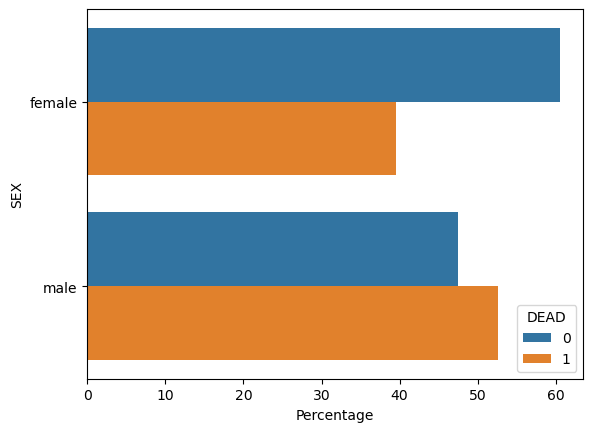

In [82]:
percentage_data = covid.groupby("SEX")['DEAD'].value_counts(normalize=True).mul(100).round(2)
percentage_data = percentage_data.reset_index(name='Percentage')
sns.barplot(data=percentage_data, y="SEX", x="Percentage", hue="DEAD", orient='h')

In [83]:
perform_chi_square_test(covid, 'DEAD', 'COPD')

H1: The variables being analyzed are dependent (there is a significant relationship).
p-value = 0.0000
Chi2 = 32.96
COPD    0.0   1.0
DEAD             
0     55979  3290
1     50414  2535


COPD,0.0,1.0
DEAD,,
0,56192.471056,3076.528944
1,50200.528944,2748.471056


In [84]:
V, strength = calculate_Cramers_V(covid, 'DEAD', 'COPD')
print(f"Cramér's V: {V:.3f}, Strength of Association: {strength}")

Cramér's V: 0.017, Strength of Association: Very weak or no association


<Axes: xlabel='Percentage', ylabel='COPD'>

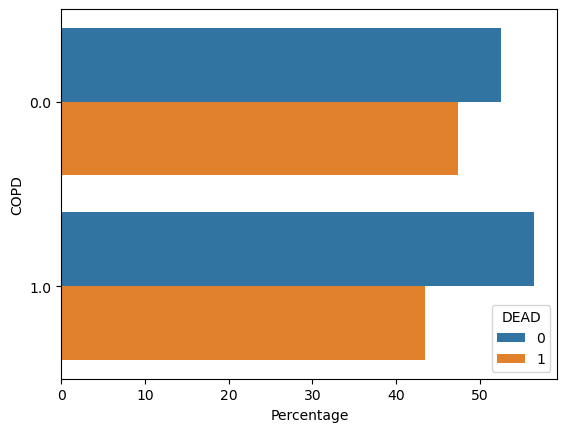

In [85]:
percentage_data = covid.groupby("COPD")['DEAD'].value_counts(normalize=True).mul(100).round(2)
percentage_data = percentage_data.reset_index(name='Percentage')
sns.barplot(data=percentage_data, y="COPD", x="Percentage", hue="DEAD", orient='h')

In [86]:
perform_chi_square_test(covid, 'DEAD', 'CHRONIC_KIDNEY_DISEASE')

H0: The variables being analyzed are independent (there is no significant relationship).
p-value = 0.0676
Chi2 = 3.34
CHRONIC_KIDNEY_DISEASE    0.0   1.0
DEAD                               
0                       55429  3811
1                       49391  3550


CHRONIC_KIDNEY_DISEASE,0.0,1.0
DEAD,,
0,55352.838716,3887.161284
1,49467.161284,3473.838716


In [87]:
V, strength = calculate_Cramers_V(covid, 'DEAD', 'CHRONIC_KIDNEY_DISEASE')
print(f"Cramér's V: {V:.3f}, Strength of Association: {strength}")

Cramér's V: 0.005, Strength of Association: Very weak or no association


<Axes: xlabel='Percentage', ylabel='CHRONIC_KIDNEY_DISEASE'>

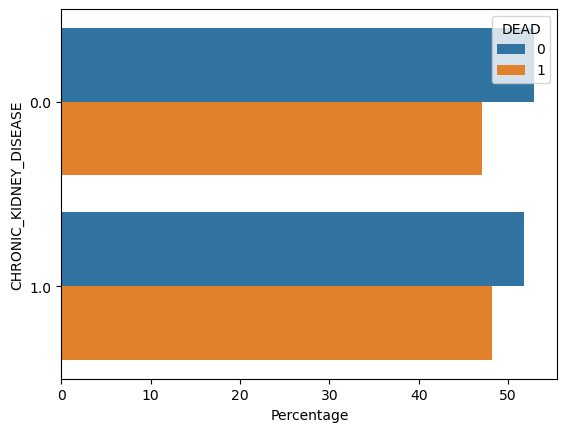

In [88]:
percentage_data = covid.groupby("CHRONIC_KIDNEY_DISEASE")['DEAD'].value_counts(normalize=True).mul(100).round(2)
percentage_data = percentage_data.reset_index(name='Percentage')
sns.barplot(data=percentage_data, y="CHRONIC_KIDNEY_DISEASE", x="Percentage", hue="DEAD", orient='h')

In [89]:
perform_chi_square_test(covid, 'DEAD', 'HYPERTENSION')

H1: The variables being analyzed are dependent (there is a significant relationship).
p-value = 0.0000
Chi2 = 469.42
HYPERTENSION    0.0    1.0
DEAD                      
0             37297  21913
1             29983  22953


HYPERTENSION,0.0,1.0
DEAD,,
0,35521.987409,23688.012591
1,31758.012591,21177.987409


In [90]:
V, strength = calculate_Cramers_V(covid, 'DEAD', 'HYPERTENSION')
print(f"Cramér's V: {V:.3f}, Strength of Association: {strength}")

Cramér's V: 0.065, Strength of Association: Very weak or no association


<Axes: xlabel='Percentage', ylabel='HYPERTENSION'>

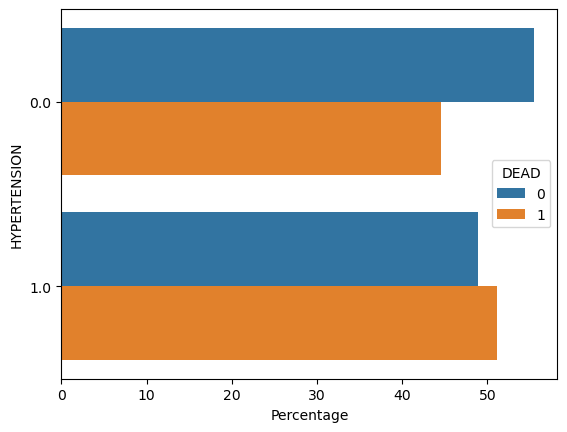

In [91]:
percentage_data = covid.groupby("HYPERTENSION")['DEAD'].value_counts(normalize=True).mul(100).round(2)
percentage_data = percentage_data.reset_index(name='Percentage')
sns.barplot(data=percentage_data, y="HYPERTENSION", x="Percentage", hue="DEAD", orient='h')

In [92]:
perform_chi_square_test(covid, 'DEAD', 'CARDIOVASCULAR_DISEASE')

H1: The variables being analyzed are dependent (there is a significant relationship).
p-value = 0.0000
Chi2 = 299.85
CARDIOVASCULAR_DISEASE    0.0   1.0
DEAD                               
0                       54488  4738
1                       50059  2855


CARDIOVASCULAR_DISEASE,0.0,1.0
DEAD,,
0,55215.807223,4010.192777
1,49331.192777,3582.807223


In [93]:
V, strength = calculate_Cramers_V(covid, 'DEAD', 'CARDIOVASCULAR_DISEASE')
print(f"Cramér's V: {V:.3f}, Strength of Association: {strength}")

Cramér's V: 0.052, Strength of Association: Very weak or no association


<Axes: xlabel='Percentage', ylabel='CARDIOVASCULAR_DISEASE'>

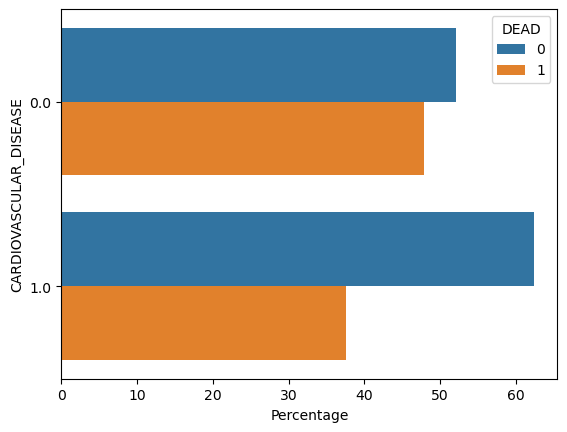

In [94]:
percentage_data = covid.groupby("CARDIOVASCULAR_DISEASE")['DEAD'].value_counts(normalize=True).mul(100).round(2)
percentage_data = percentage_data.reset_index(name='Percentage')
sns.barplot(data=percentage_data, y="CARDIOVASCULAR_DISEASE", x="Percentage", hue="DEAD", orient='h')

In [95]:
perform_chi_square_test(covid, 'DEAD', 'ASTHMA')

H1: The variables being analyzed are dependent (there is a significant relationship).
p-value = 0.0000
Chi2 = 2202.10
ASTHMA    0.0   1.0
DEAD               
0       54299  4975
1       51863  1085


ASTHMA,0.0,1.0
DEAD,,
0,56073.197662,3200.802338
1,50088.802338,2859.197662


In [96]:
V, strength = calculate_Cramers_V(covid, 'DEAD', 'ASTHMA')
print(f"Cramér's V: {V:.3f}, Strength of Association: {strength}")

Cramér's V: 0.140, Strength of Association: Weak association


<Axes: xlabel='Percentage', ylabel='ASTHMA'>

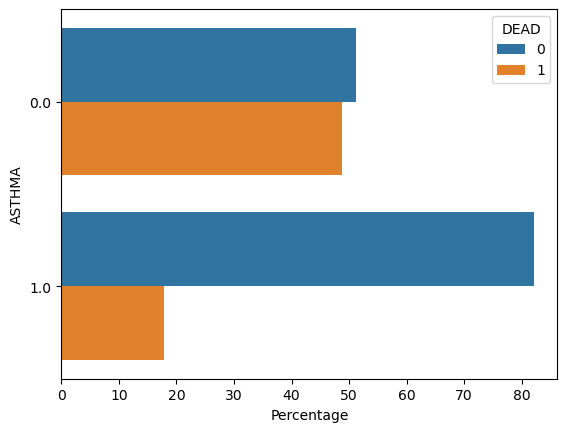

In [97]:
percentage_data = covid.groupby("ASTHMA")['DEAD'].value_counts(normalize=True).mul(100).round(2)
percentage_data = percentage_data.reset_index(name='Percentage')
sns.barplot(data=percentage_data, y="ASTHMA", x="Percentage", hue="DEAD", orient='h')

### **Interpretation:**
1. **Chronic Kidney Disease** (Mortality rates are almost the same between patients with and without this comorbidity):
- There is no significant relationship between chronic kidney disease and mortality in this dataset.
2. **Hypertension** (Example of a comorbidity where mortality rates are higher in affected patients):
- Hypertension is statistically significantly associated with mortality (p < 0.05), but the strength of this relationship is very weak (Cramér’s V = 0.065).
- This suggests that while hypertension is more common among deceased individuals, other factors likely play a much bigger role in determining mortality.
3. **Cardiovascular Disease** (Counterintuitive result: higher mortality in patients without this comorbidity):
- Cardiovascular disease shows a statistically significant association with mortality (p < 0.05), but the relationship strength is very weak (Cramér’s V = 0.052).
- The counterintuitive finding—a higher mortality percentage in patients without cardiovascular disease—may be due to confounding factors (e.g., age, treatment differences, or other comorbidities) rather than a true protective effect of cardiovascular disease.
- Therefore, the observed mortality distribution may not be meaningful without further analysis.
4. **Asthma** (Most extreme counterintuitive result: higher mortality in patients without this comorbidity):
- Asthma is significantly associated with mortality (p < 0.05), but the association strength remains weak (Cramér’s V = 0.140).
- As with cardiovascular disease, the lower mortality rate in asthmatic patients (about 2.5 times lower than in non-asthmatics) may be due to confounding factors such as age, prior medical care, or asthma treatments reducing disease severity.
5. **Gender** (Men have higher mortality rates than women):
- There is a statistically significant association between sex and mortality (p < 0.05), with men showing higher mortality rates than women. However, the strength of this relationship is weak (Cramér’s V = 0.129).
- This suggests that while sex influences mortality, other factors such as age, comorbidities, and access to healthcare are more influential.
### **Summary Conclusion:**
While some factors (e.g., hypertension, cardiovascular disease, asthma, and sex) show significant associations with mortality, their individual effect sizes are weak. This indicates that other factors—such as age, overall health status, and quality of medical care—likely play a much larger role in determining mortality.

